## Summary 

- General task: help doctors diagnose breast cancer.
    
- Data: from biopsed breast cells: benign or malignant

- Subtasks: 
    - What features of a cell are the largest drivers of malignancy?
    - How a physician use this project?
    - How would you go about determining the most cost-effective method of detecting malignancy? Assume that 
      there is a non-zero cost in time and money in collecting each feature about a cell. 

- The three most important features for identifying malignancy are:
    - Uniformity of cell shape 
    - Uniformity of Cell Size
    - Bland Chromatin 
    
- A physician will feed the new data to the trained algorithm: forest.predict(new_data). Generally, the physician would use this algorithm as a tool to quickly identify cases where (those predicted as malignant by the algorithm) need further testing. 

- The three most important features mentioned above would be the priority in collecting the feature data since they are the most predictive. Additional features should be collected based on their importances.  

## Data ingestion and EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/danielvalle/Documents/Coding/Insight/Data_challenges/Breast_cancer_detection/breast-cancer-wisconsin.txt')
data.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


### EDA

In [2]:
data.replace(['No idea', '#', '?'], np.nan, inplace=True)    # Convert non-numerical 'No idea, #, ?' cells to NA

print(data.isna().sum())                                     # Identify na values 

nan_values = data[data.isna().any(axis=1)]                   # Identify max na values 
print(len(nan_values))

data.dropna(inplace=True)                                    # Drop NA values because only 95, small number should not affect much size
data = data.astype(int)                                      # Convert to integer
data.drop_duplicates('ID', inplace=True)                     # Drop duplicates 
data.reset_index(drop=True, inplace=True)                    # Reset index
data.drop(['Index', 'ID'], axis=1, inplace=True)             # Drop index + ID columns 

Index                           0
ID                              0
Clump Thickness                 0
Uniformity of Cell Size        79
Uniformity of Cell Shape       79
Marginal Adhesion              79
Single Epithelial Cell Size    79
Bare Nuclei                    95
Bland Chromatin                79
Normal Nucleoli                79
Mitoses                        79
Class                          79
dtype: int64
95


In [3]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,650.000000,650.000000,650.00000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,6.607692,4.989231,4.78000,4.375385,4.432308,5.429231,4.824615,4.267692,2.072308,3.846154
std,12.394825,11.356319,9.58343,9.989240,7.397322,12.101220,8.264130,9.210885,3.732504,6.191676
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.00000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,2.00000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,7.000000,5.000000,6.00000,4.000000,4.000000,8.000000,5.000000,5.000000,1.000000,4.000000
max,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,70.000000,100.000000,70.000000,40.000000


Notice that most of the features in this dataset are correlated, value higher than .5 

In [4]:
# identify correlation 
# Slightly or high correlation occur when values are 0.5 ~~ 0.75
data.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.867156,0.871509,0.739669,0.838476,0.828870,0.848487,0.763298,0.614433,0.942005
Uniformity of Cell Size,0.867156,1.000000,0.941432,0.765528,0.824705,0.838601,0.848643,0.888186,0.569385,0.907717
Uniformity of Cell Shape,0.871509,0.941432,1.000000,0.757364,0.814646,0.854436,0.834707,0.835968,0.590369,0.904336
Marginal Adhesion,0.739669,0.765528,0.757364,1.000000,0.848167,0.754359,0.784370,0.675963,0.542211,0.845464
Single Epithelial Cell Size,0.838476,0.824705,0.814646,0.848167,1.000000,0.721137,0.821785,0.738979,0.570319,0.871956
Bare Nuclei,0.828870,0.838601,0.854436,0.754359,0.721137,1.000000,0.842706,0.730795,0.517734,0.874956
Bland Chromatin,0.848487,0.848643,0.834707,0.784370,0.821785,0.842706,1.000000,0.787977,0.555385,0.906587
Normal Nucleoli,0.763298,0.888186,0.835968,0.675963,0.738979,0.730795,0.787977,1.000000,0.513455,0.837024
Mitoses,0.614433,0.569385,0.590369,0.542211,0.570319,0.517734,0.555385,0.513455,1.000000,0.658806
Class,0.942005,0.907717,0.904336,0.845464,0.871956,0.874956,0.906587,0.837024,0.658806,1.000000


Text(0.5,1,'Feature correlation matrix')

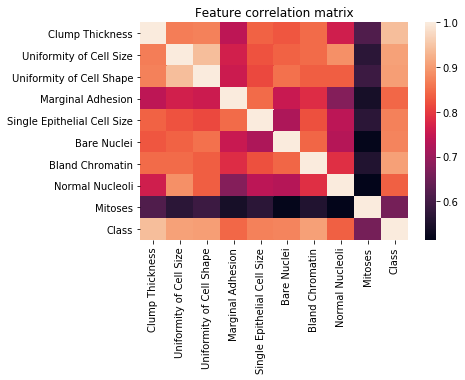

In [5]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title('Feature correlation matrix')

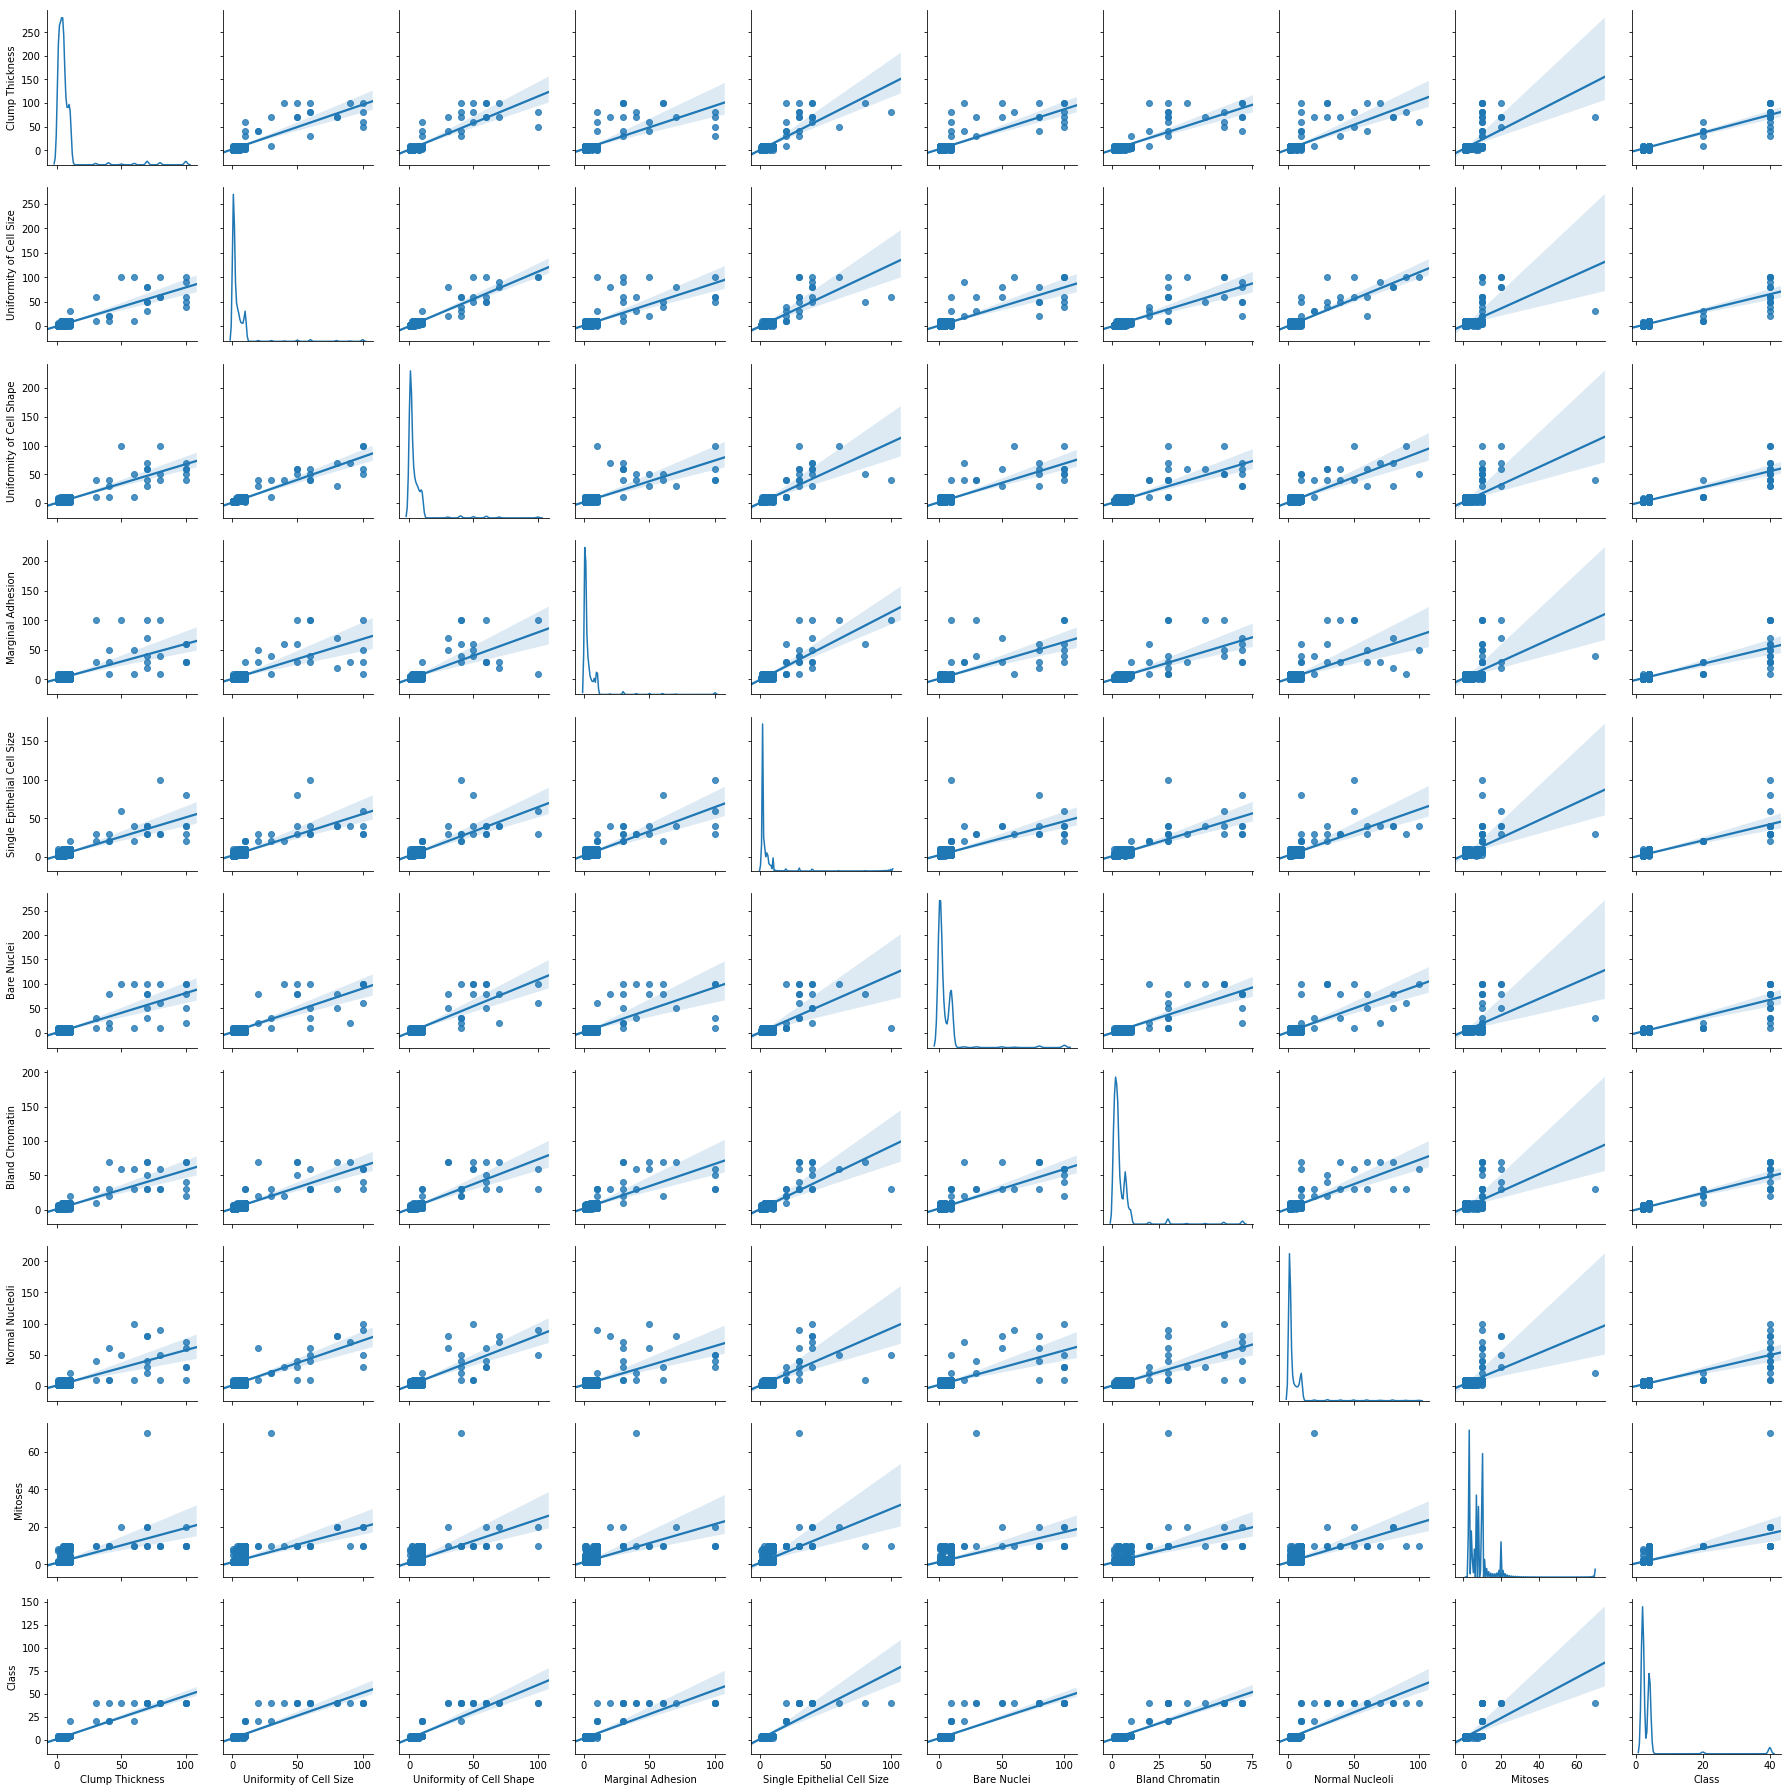

In [6]:
sns.pairplot(data, kind='reg', diag_kind='kde')

Text(0.5,1,'Y-variable classes')

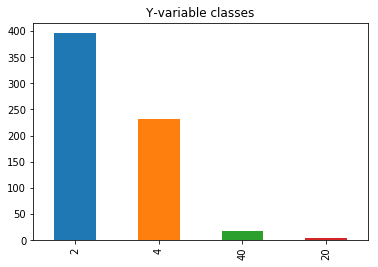

In [7]:
# Balanced class of y variable
data['Class'].value_counts().plot(kind='bar')
plt.title('Y-variable classes')

Text(0.5,1,'Y-variable classes')

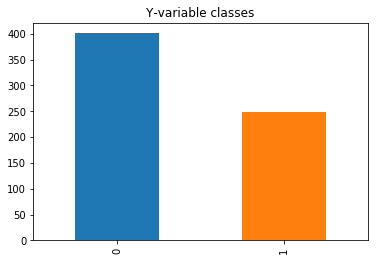

In [8]:
# Replace 20 and 40 values in y-variable
data['Class'].replace([20, 40, 2, 4], [0, 1, 0, 1], inplace=True)
data['Class'].value_counts().plot(kind='bar')
plt.title('Y-variable classes')

### Modeling 

- Binary classification problem
- Possible models: Tree-based classifier due to colinearity. Another way to deal with colinearity is dimensionality reduction,  as PCA. I will use a random forest in this first iteration. 
- Metrics: Recall, reduce the number of people having cancer diagnosed as not having cancer. 

In [9]:
# Split data into train, test, validation set  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['Class'])], data['Class'], test_size=0.25, random_state=42)

In [10]:
# Train model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc

forest = RandomForestClassifier(n_estimators=20, random_state=2)
forest.fit(X_train, y_train)

y_predict = forest.predict(X_test)

print('Train data score:', forest.score(X_train, y_train))
print('Test data score:', forest.score(X_test, y_test))
print('Recall score:', recall_score(y_test, y_predict))

Train data score: 1.0
Test data score: 0.9447852760736196
Recall score: 0.95


Need to improve recall (reduce false negatives) of class 1 (malignant) since we want to identify cancer. 

In [11]:
# Classification report
cl_report = classification_report(y_test, y_predict, sample_weight=None, digits=4)
print(cl_report)

             precision    recall  f1-score   support

          0     0.9700    0.9417    0.9557       103
          1     0.9048    0.9500    0.9268        60

avg / total     0.9460    0.9448    0.9451       163



In [12]:
# Adjust model to improve recall: reduce true positive rate
y_scores = forest.predict_proba(X_test)[:, 1]                  # Get y-scores instead of y-predictions
p, r, thresholds = precision_recall_curve(y_test, y_scores)    # Get thresholds 
y_pred_adjusted = [1 if y >= 0.3 else 0 for y in y_scores]
cl_report_adjusted = classification_report(y_test, y_pred_adjusted, sample_weight=None, digits=4)
print(cl_report_adjusted) 

             precision    recall  f1-score   support

          0     1.0000    0.9029    0.9490       103
          1     0.8571    1.0000    0.9231        60

avg / total     0.9474    0.9387    0.9394       163



In [13]:
# Plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

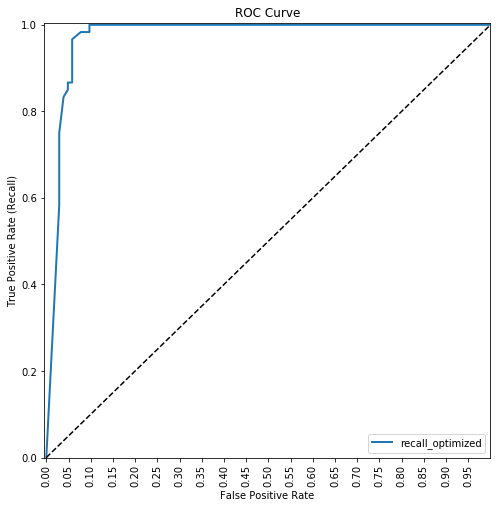

In [14]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
plot_roc_curve(fpr, tpr, 'recall_optimized')

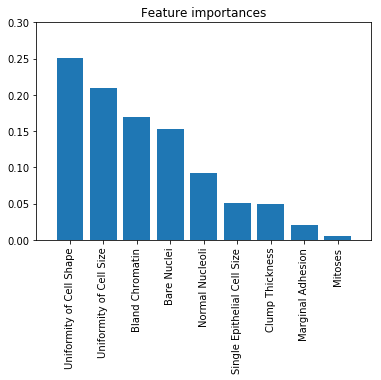

In [15]:
# Feature importances 
importances = np.asarray(sorted(forest.feature_importances_, reverse=True)[:9])
indices = np.argsort(importances)[::-1]

# Create labels
X_train = [str(i) for i in X_train]
feature_importance_values = list(zip(forest.feature_importances_, X_train))
features = sorted(feature_importance_values, key = lambda x: x[0], reverse=True)[:9]
labels = [x[1] for x in features]

# Plot 30 most important features
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), labels, rotation=90)
plt.xlim([-1, 9])
plt.ylim([0, 0.3])
plt.show()

## Conclusions

In order to help doctors diagnose breast cancer a random forest model was trained. A tree-based model was chosed due to the colinearity showed by most of the ten predictive variables. Recall was used as the metric of evaluation since it is assumed that it is more important to diagnose individuals having breast cancer that to misdiagnose those individuals not having cancer. The classification score threshold was lowered to .3 in order to meet this requirement yielding zero difference between individuals having breast cancer and individuals diagnosed as having this condition. Finally, uniformity of cell shape, uniformity of cell size, and Bland chromatin were found as the most informative features in predicting breast cancer.